<a href="https://colab.research.google.com/github/PlayMoodify/PlayMoodify.app/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PlayMoodify


Analisi del dataset ottenuto tramite la piattaforma Kaggle

In [106]:
# Caricamento del dataset dalla piattaforma kaggle
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split


file_path = "278k_song_labelled.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "abdullahorzan/moodify-dataset",
  file_path,
)


Using Colab cache for faster access to the 'moodify-dataset' dataset.


In [107]:
# Visualizzazione della struttura dataset, con visualizzazione dei primi 5 record di quest'ultimo

In [108]:
display(df.head())

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1


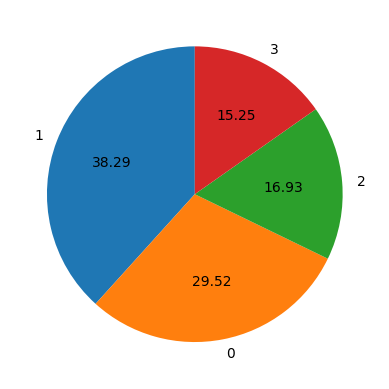

In [109]:
# Distribuzione delle classi {'sad' : 0, 'happy' : 1, 'Energetic' : 2, 'Calm' : 3}
plt.pie(df["labels"].value_counts().values, labels=df["labels"].value_counts().index, autopct="%.2f", startangle=90)
plt.show()

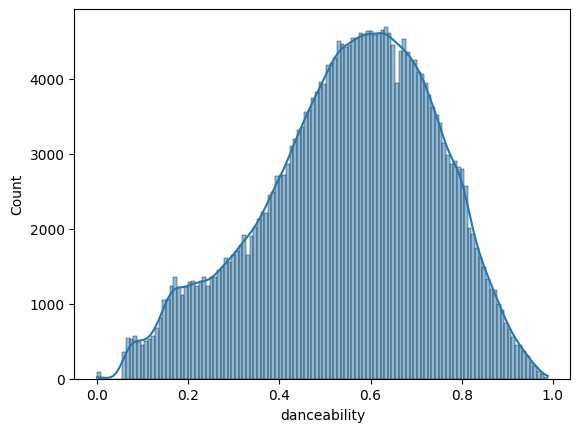

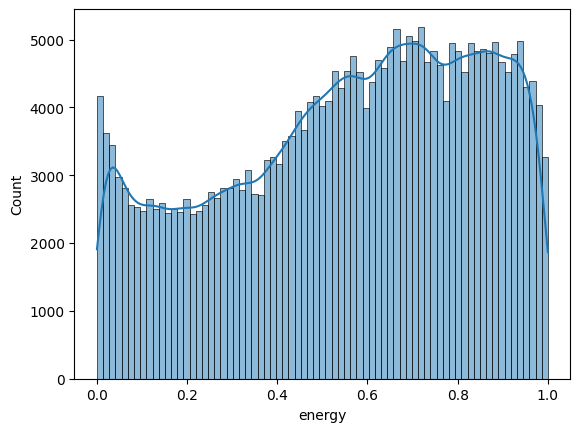

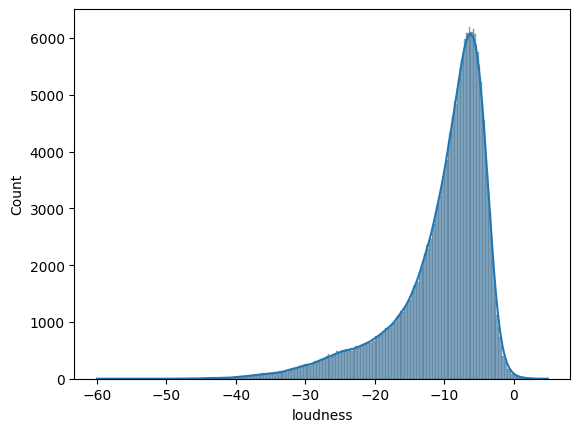

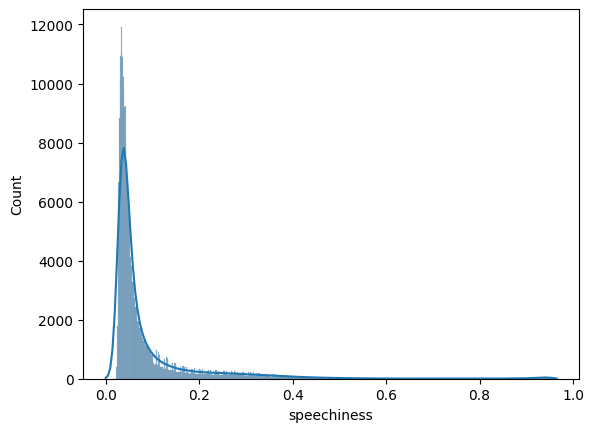

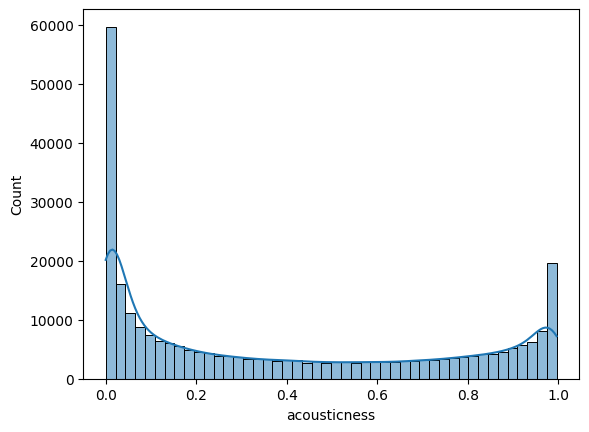

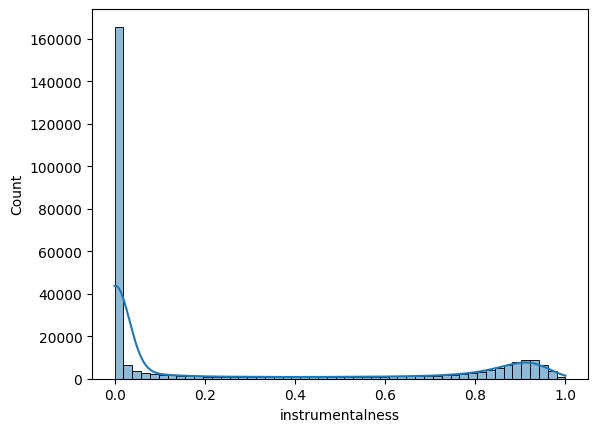

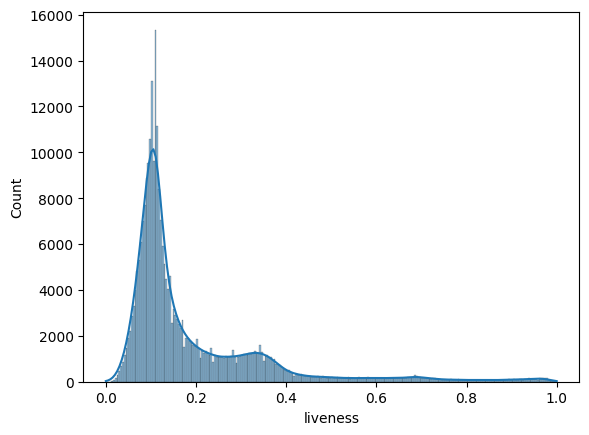

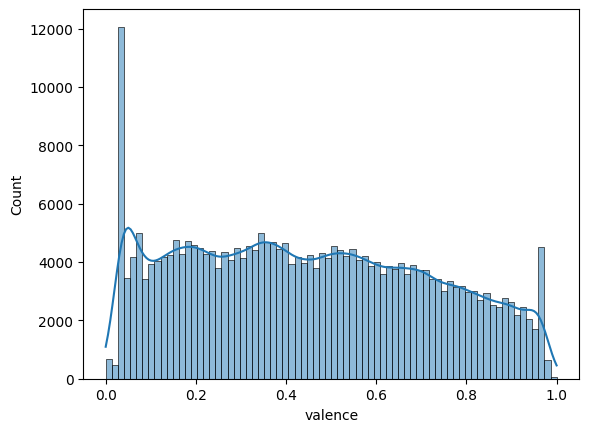

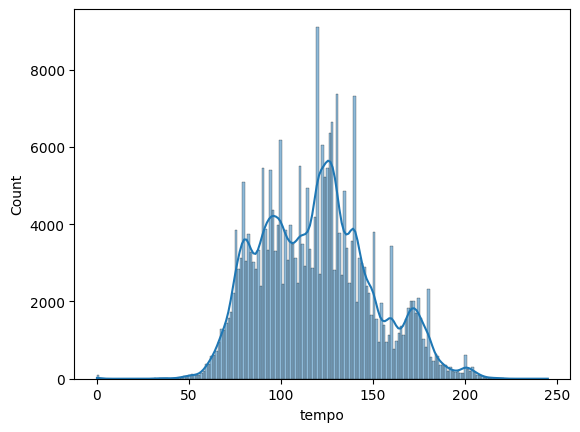

In [110]:
# Analisi della distribuzione delle singole feature all'interno del dataset
sns.histplot(df["danceability"], kde=True)
plt.show()

sns.histplot(df["energy"], kde=True)
plt.show()

sns.histplot(df["loudness"], kde=True)
plt.show()

sns.histplot(df["speechiness"], kde=True)
plt.show()

sns.histplot(df["acousticness"], kde=True)
plt.show()

sns.histplot(df["instrumentalness"], kde=True)
plt.show()

sns.histplot(df["liveness"], kde=True)
plt.show()

sns.histplot(df["valence"], kde=True)
plt.show()

sns.histplot(df["tempo"], kde=True)
plt.show()

Dall’osservazione dei grafici sopra riportati possiamo notare che:
*   La feature Energy risulta essere ben distribuita nella scala tra 0 e 1;
*   Le feature Speechiness e Instrumentalness hanno un alto picco su 0;
*   Le feature Acousticness e Valence hanno picchi sia su 0 che su 1;
*   La feature Danceability ha un picco nei valori che vanno tra 0.4 e 0.8;
*   La feature Liveness ha un picco tra 0 e 0.2, per poi decrescere
drasticamente fino ad 1.







Individuazione di entry non significative

In [111]:
# Verifichiamo la presenza di brani campionati in modo errato
print((df["spec_rate"] == 0.0).sum())
display(df[df["spec_rate"] == 0.0])

90


,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
4854,4854,161474.0,0.0,0.93200,-13.238,0.0,0.123000,1.000000,0.7200,0.0,0.0,0.0,0
11951,11951,14040.0,0.0,0.81700,-10.403,0.0,0.650000,0.013600,0.1010,0.0,0.0,0.0,0
13183,13183,189000.0,0.0,0.96800,-5.182,0.0,0.000004,0.000036,0.1160,0.0,0.0,0.0,2
23301,23301,223280.0,0.0,0.16900,-14.467,0.0,0.598000,0.274000,0.2990,0.0,0.0,0.0,0
24380,24380,147000.0,0.0,0.40500,-9.935,0.0,0.842000,0.001140,0.1980,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269701,269701,11227.0,0.0,0.03040,-17.836,0.0,0.000238,0.596000,0.0694,0.0,0.0,0.0,3
269815,269815,39493.0,0.0,0.00002,-60.000,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.0,0
271602,271602,168720.0,0.0,0.36400,-8.046,0.0,0.671000,0.000000,0.1780,0.0,0.0,0.0,0
272146,272146,188400.0,0.0,0.06440,-18.222,0.0,0.982000,0.598000,0.2680,0.0,0.0,0.0,3


In [112]:
# Verifichiamo la presenza di tracce che hanno tempo (bpm) pari a 0.0, che rappresentano errori di campionamento o tracce che non sono canzoni
print((df["tempo"] == 0.0).sum())
display(df[df["tempo"] == 0.0])

90


,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
4854,4854,161474.0,0.0,0.93200,-13.238,0.0,0.123000,1.000000,0.7200,0.0,0.0,0.0,0
11951,11951,14040.0,0.0,0.81700,-10.403,0.0,0.650000,0.013600,0.1010,0.0,0.0,0.0,0
13183,13183,189000.0,0.0,0.96800,-5.182,0.0,0.000004,0.000036,0.1160,0.0,0.0,0.0,2
23301,23301,223280.0,0.0,0.16900,-14.467,0.0,0.598000,0.274000,0.2990,0.0,0.0,0.0,0
24380,24380,147000.0,0.0,0.40500,-9.935,0.0,0.842000,0.001140,0.1980,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269701,269701,11227.0,0.0,0.03040,-17.836,0.0,0.000238,0.596000,0.0694,0.0,0.0,0.0,3
269815,269815,39493.0,0.0,0.00002,-60.000,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.0,0
271602,271602,168720.0,0.0,0.36400,-8.046,0.0,0.671000,0.000000,0.1780,0.0,0.0,0.0,0
272146,272146,188400.0,0.0,0.06440,-18.222,0.0,0.982000,0.598000,0.2680,0.0,0.0,0.0,3


In [113]:
# Verifichiamo la presenza di entry che non rappresentano brani, poichè di durata troppo breve o troppo elevata. Dunque, podcast, ecc...
df["duration (min)"] = df["duration (ms)"] / (1000 * 60)
df.drop("duration (ms)", axis=1, inplace=True)

# Tracce di lunghezza superiore a 10 min
print("TRACCE MAGGIORI DI 10 MINUTI: ")
print((df["duration (min)"] > 10).sum())
display(df[df["duration (min)"] > 10])

# Tracce con lunghezza inferiore ad 1 min
print("TRACCE INFERIORI A 1 MINUTO: ")
print((df["duration (min)"] < 1).sum())
display(df[df["duration (min)"] < 1])

TRACCE MAGGIORI DI 10 MINUTI: 
2949


,Unnamed: 0,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,duration (min)
301,301,0.457,0.9650,0.457,0.4860,0.085,0.000000,0.6970,0.6040,170.122,7.682276e-07,2,10.543750
627,627,0.528,0.3490,-18.761,0.0302,0.474,0.497000,0.6280,0.6420,76.097,4.231013e-08,0,11.896283
650,650,0.412,0.4600,-13.222,0.0336,0.118,0.411000,0.7190,0.6040,102.135,4.008795e-08,0,13.969283
651,651,0.590,0.3900,-15.613,0.0335,0.248,0.403000,0.9880,0.5630,104.619,4.761952e-08,0,11.724883
751,751,0.559,0.5110,-11.167,0.0326,0.553,0.802000,0.0865,0.7420,87.999,4.402312e-08,0,12.342000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275314,275314,0.227,0.1750,-16.656,0.0392,0.906,0.000005,0.0993,0.2130,76.105,5.764138e-08,0,11.334450
275331,275331,0.175,0.3460,-9.170,0.0340,0.661,0.000002,0.6300,0.1520,179.026,5.657389e-08,0,10.016400
275332,275332,0.318,0.2150,-13.555,0.0341,0.868,0.000000,0.2380,0.1960,101.310,3.965116e-08,0,14.333333
275339,275339,0.251,0.3380,-9.224,0.0295,0.838,0.000000,0.1000,0.2080,146.687,4.092510e-08,0,12.013817


TRACCE INFERIORI A 1 MINUTO: 
1680


,Unnamed: 0,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,duration (min)
1061,1061,0.417,0.1400,-14.404,0.0495,0.712,0.224000,0.1910,0.03940,47.689,1.530234e-06,0,0.539133
1402,1402,0.686,0.4370,-10.040,0.0984,0.601,0.000028,0.1530,0.57900,71.652,1.845012e-06,1,0.888883
1404,1404,0.683,0.4680,-10.058,0.0743,0.870,0.673000,0.1080,0.47000,117.095,1.292264e-06,0,0.958267
1704,1704,0.531,0.4980,-20.324,0.1230,0.385,0.892000,0.3030,0.26100,100.182,2.214341e-06,3,0.925783
1882,1882,0.851,0.3660,-9.884,0.0429,0.918,0.459000,0.3100,0.91100,74.385,8.081379e-07,0,0.884750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
276881,276881,0.491,0.2330,-13.970,0.2230,0.898,0.833000,0.1080,0.15800,209.887,3.859400e-06,3,0.963017
276886,276886,0.119,0.7340,-18.570,0.0677,0.505,0.895000,0.1690,0.00001,97.174,1.259371e-06,3,0.895950
277800,277800,0.688,0.5730,-14.046,0.3580,0.778,0.000366,0.3480,0.94800,98.871,6.572787e-06,1,0.907783
277845,277845,0.824,0.0773,-12.007,0.2720,0.918,0.000687,0.0963,0.39300,137.227,6.100159e-06,0,0.743150


Rimozione di entry e feature non significative

In [114]:
# Rimuoviamo le entry non significative
print(f"Dimensione record prima della rimozione delle entry non significative: {df.shape[0]}")
df.drop(df[df["spec_rate"] == 0.0].index, inplace=True)
df.drop(df[df["tempo"] == 0.0].index, inplace=True)
df.drop(df[df["duration (min)"] > 10].index, inplace=True)
df.drop(df[df["duration (min)"] < 1].index, inplace=True)
print(f"Dimensione record dopo la rimozione delle entry non significative: {df.shape[0]}")

Dimensione record prima della rimozione delle entry non significative: 277938
Dimensione record dopo la rimozione delle entry non significative: 273252


In [115]:
# Rimuoviamo le feature non significative
df.drop("duration (min)", axis=1, inplace=True)
df.drop("spec_rate", axis=1, inplace=True)
df.drop("Unnamed: 0", axis=1, inplace=True)
display(df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,labels
0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,2
1,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1
2,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,1
3,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,0
4,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,1


Utilizziamo una matrice di correlazione per individuare il grado di correlazione tra le feature presenti nel dataset

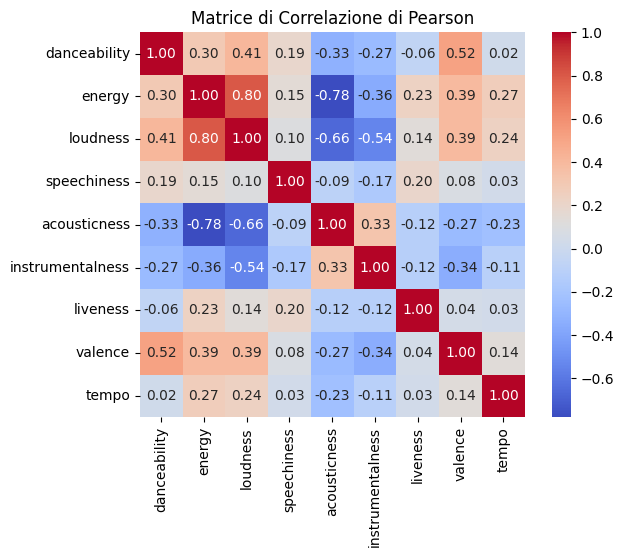

La coppia di feature con più alta correlazione risulta essere:
 energy  loudness    0.803044


In [126]:
# Rimuoviamo la feature label dal dataset di partenza
df_corr = df.drop("labels", axis=1)

# Calcoliamo con il metodo perason la matrice di correlazione
corr_matrix = df_corr.corr(method = "pearson")


# Visualizzazione della matrice di correlazione
plt.figure(figsize=(7, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True
)
plt.title("Matrice di Correlazione di Pearson")
plt.show()

# Individuazione automatica delle feature ad alta correlazione
threshold = 0.8

# Rappresentazione delle feature con alta correlazione
high_corr_pairs = (
    corr_matrix.abs()
      .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
      .stack()
      .sort_values(ascending=False)
)

result = high_corr_pairs[high_corr_pairs > threshold]
print(f"La coppia di feature con più alta correlazione risulta essere:\n {result.to_string()}")

Dall'analisi della matrice di correlazione emerge un legame molto stretto tra **energy** e **loudness**. Abbiamo scelto di escludere **loudness** per ridurre la ridondanza dei dati, privilegiando **energy** in quanto variabile più indicativa della componente emotiva del brano, rispetto al dato prettamente tecnico del volume. Successivamente ricalcoliamo la matrice di correlazione rimuovendo la feature **loudness**, per verificare la presenza di ulteriori correlazioni causate dalla sua rimozione.

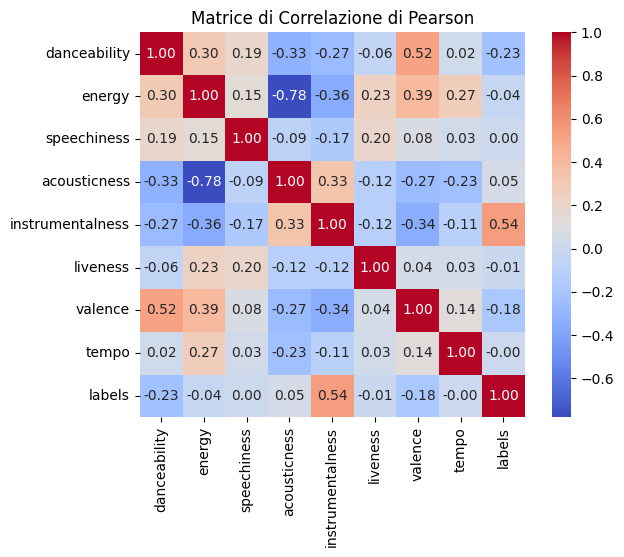

Nessuna coppia supera la soglia di correlazione impostata.


In [129]:
# Rimuoviamo la feature loudness dal dataset
df_corr = df.drop("loudness", axis=1)

# Calcoliamo con il metodo perason la matrice di correlazione senza loudness
corr_matrix = df_corr.corr(method = "pearson")


# Visualizzazione della matrice di correlazione senza loudness
plt.figure(figsize=(7, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True
)
plt.title("Matrice di Correlazione di Pearson")
plt.show()

# Individuazione automatica delle feature ad alta correlazione
threshold = 0.8

# Rappresentazione delle feature con alta correlazione
high_corr_pairs = (
    corr_matrix.abs()
      .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
      .stack()
      .sort_values(ascending=False)
)

result = high_corr_pairs[high_corr_pairs > threshold]

if not result.empty:
    print(f"La coppia di feature con più alta correlazione risulta essere:\n{result.to_string()}")
else:
    print("Nessuna coppia supera la soglia di correlazione impostata.")

Analizziamo nuovamente la distribuzione delle classi e delle feature nel dataset dopo la pulizia da feature e entry non significative

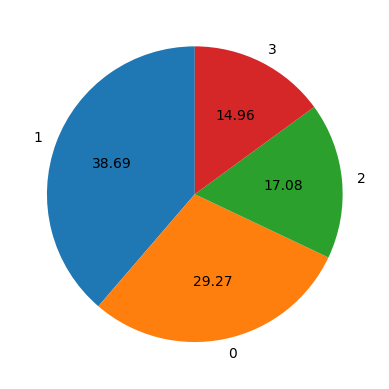

In [117]:
# Distribuzione delle classi dopo la pulizia del dataset
plt.pie(df["labels"].value_counts().values, labels=df["labels"].value_counts().index, autopct="%.2f", startangle=90)
plt.show()

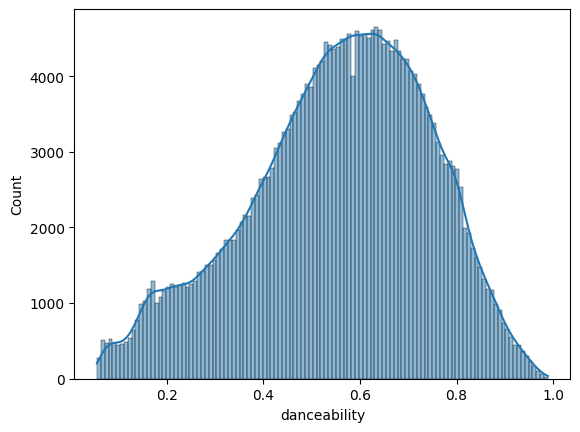

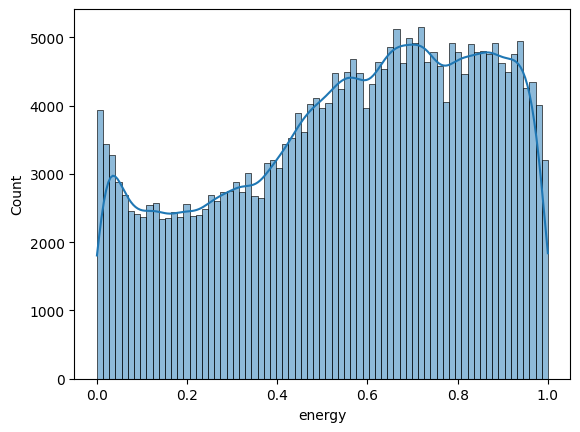

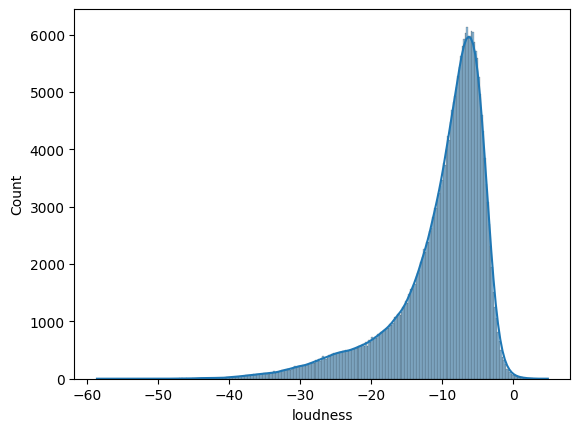

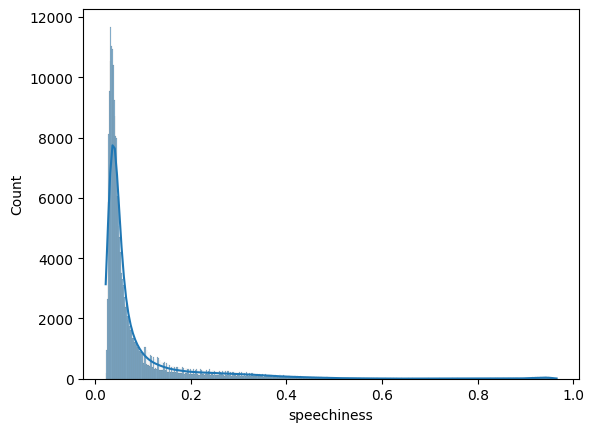

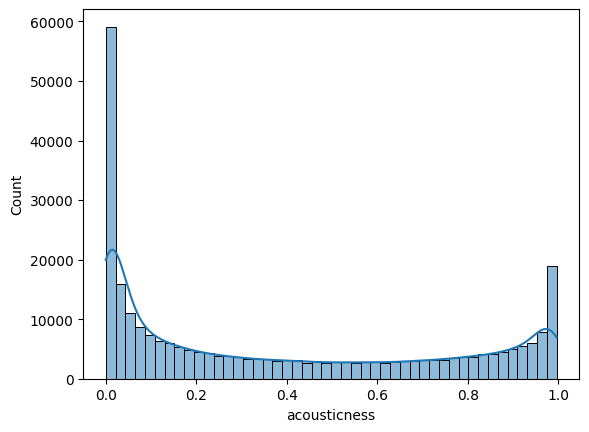

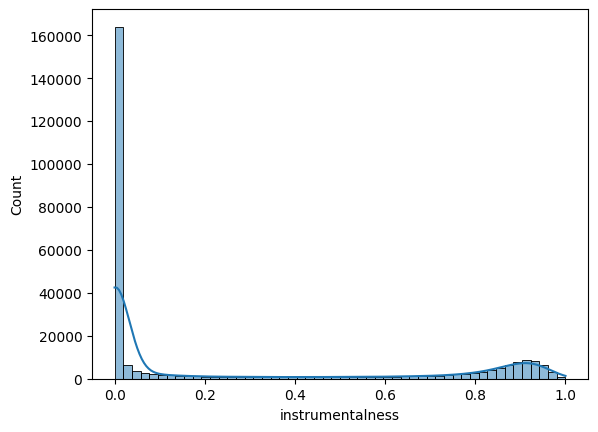

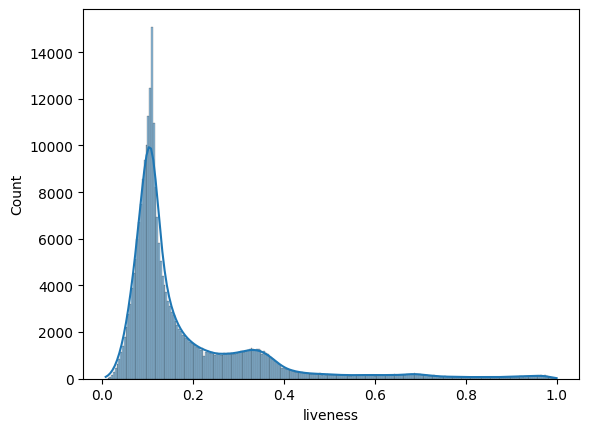

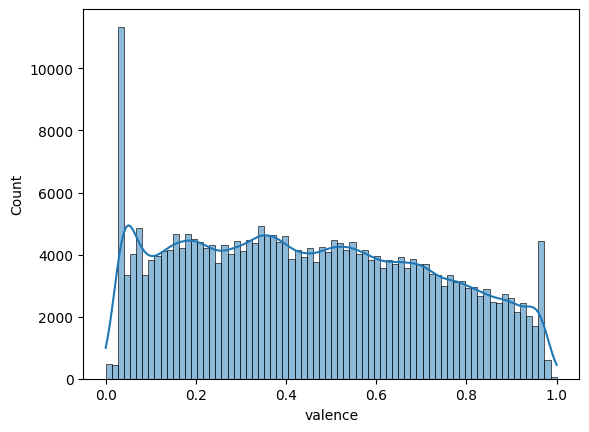

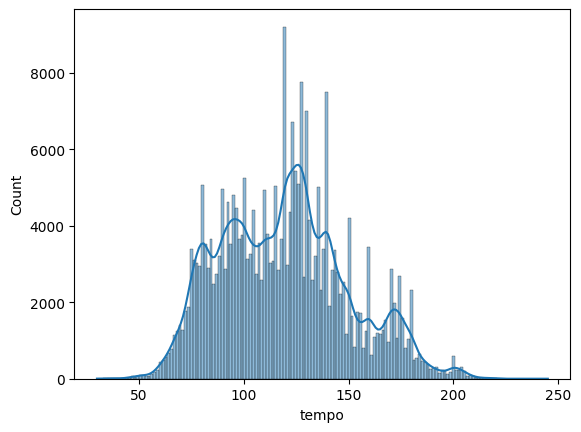

In [118]:
# Analisi della distribuzione delle singole feature dopo la pulizia del dataset
sns.histplot(df["danceability"], kde=True)
plt.show()

sns.histplot(df["energy"], kde=True)
plt.show()

sns.histplot(df["loudness"], kde=True)
plt.show()

sns.histplot(df["speechiness"], kde=True)
plt.show()

sns.histplot(df["acousticness"], kde=True)
plt.show()

sns.histplot(df["instrumentalness"], kde=True)
plt.show()

sns.histplot(df["liveness"], kde=True)
plt.show()

sns.histplot(df["valence"], kde=True)
plt.show()

sns.histplot(df["tempo"], kde=True)
plt.show()